## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/' \
             + 'examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data0 = response.text

print(len(data0))
print(data0[0:500])

784594
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
n00015388_355	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
n00015388_379	http://fotootjesvanannelies.web-log.nl/olifan


In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = [line.strip() for line in data0.split(split_tag) if len(line.strip()) > 0]
print(len(data))
print(data[0])

9995
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


## 將 txt 轉成 pandas dataframe

In [4]:
# check data[j] all have the same number of fields
import numpy as np
field_counts = np.array([len(line.split('\t')) for line in data])
print(field_counts.min())
print(field_counts.max())

2
2


In [5]:
import pandas as pd

arranged_data = [line.split('\t') for line in data]
df = pd.DataFrame(arranged_data, columns=['id', 'url'])
df.head()

,id,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [21]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 'url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

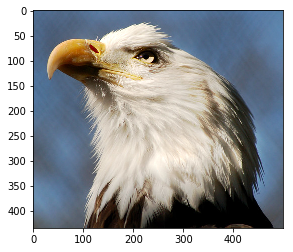

In [22]:
# Convert img to numpy array
img_arr = np.array(img)
plt.imshow(img_arr)
plt.show()

In [48]:
def img2arr_fromURLs(url_list, resize = False):
    """
    Args:
        url_list: list of URLs
        resize: bool
    Returns:
        list of images as numpy arrays
    """
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
        except IOError as e:
            print('failed to fetch image from', url)
            continue
        if resize:  
            # shrink to height = 70
            new_h = 70
            w, h = img.size
            if h > new_h:
                img = img.resize((int(w/h*new_h), new_h), Image.CUBIC)
        img_list.append(np.array(img))
    return img_list

failed to fetch image from http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
number of images we got: 4 


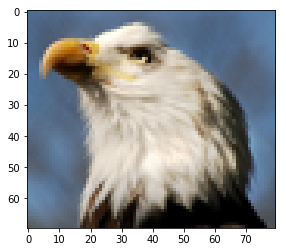

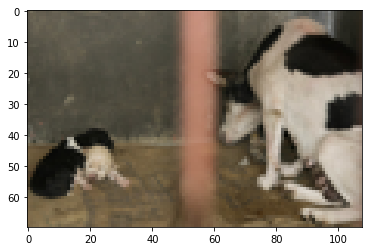

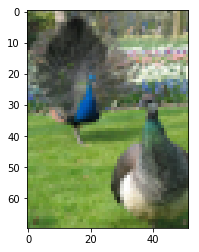

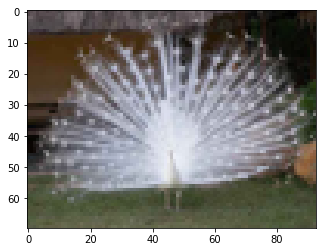

In [49]:
result = img2arr_fromURLs(df[0:5]['url'].values, True)

print("number of images we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()